## **Credit - LDA. QDA, Logistic Regression, Confusion Matrix, ROC Curves** <font color="blue"></font>

1. Download `Credit.csv` from <http://www.statlearning.com/resources-first-edition> and upload it into this notebook. Print the first $5$ rows of the data. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results. 
2. Keep only `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, and `Balance` as your variables and throw the rest of variables away. Print the dimension of this new dataset. 
3. Create a binary variable `Balance_1500` which equals $1$ for the observations with `Balance` $> 1500$, and equals $0$ otherwise.
4. Model `Balance_1500` by the explanatory variables `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education` using the following models: 
    + logistic regression, 
    + linear discriminant, and 
    + quadratic discriminant.
8. Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   | 
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

</br>
    
9. For each method, print the confusion matrix, the accuracy score and the AUC using all observations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score


# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


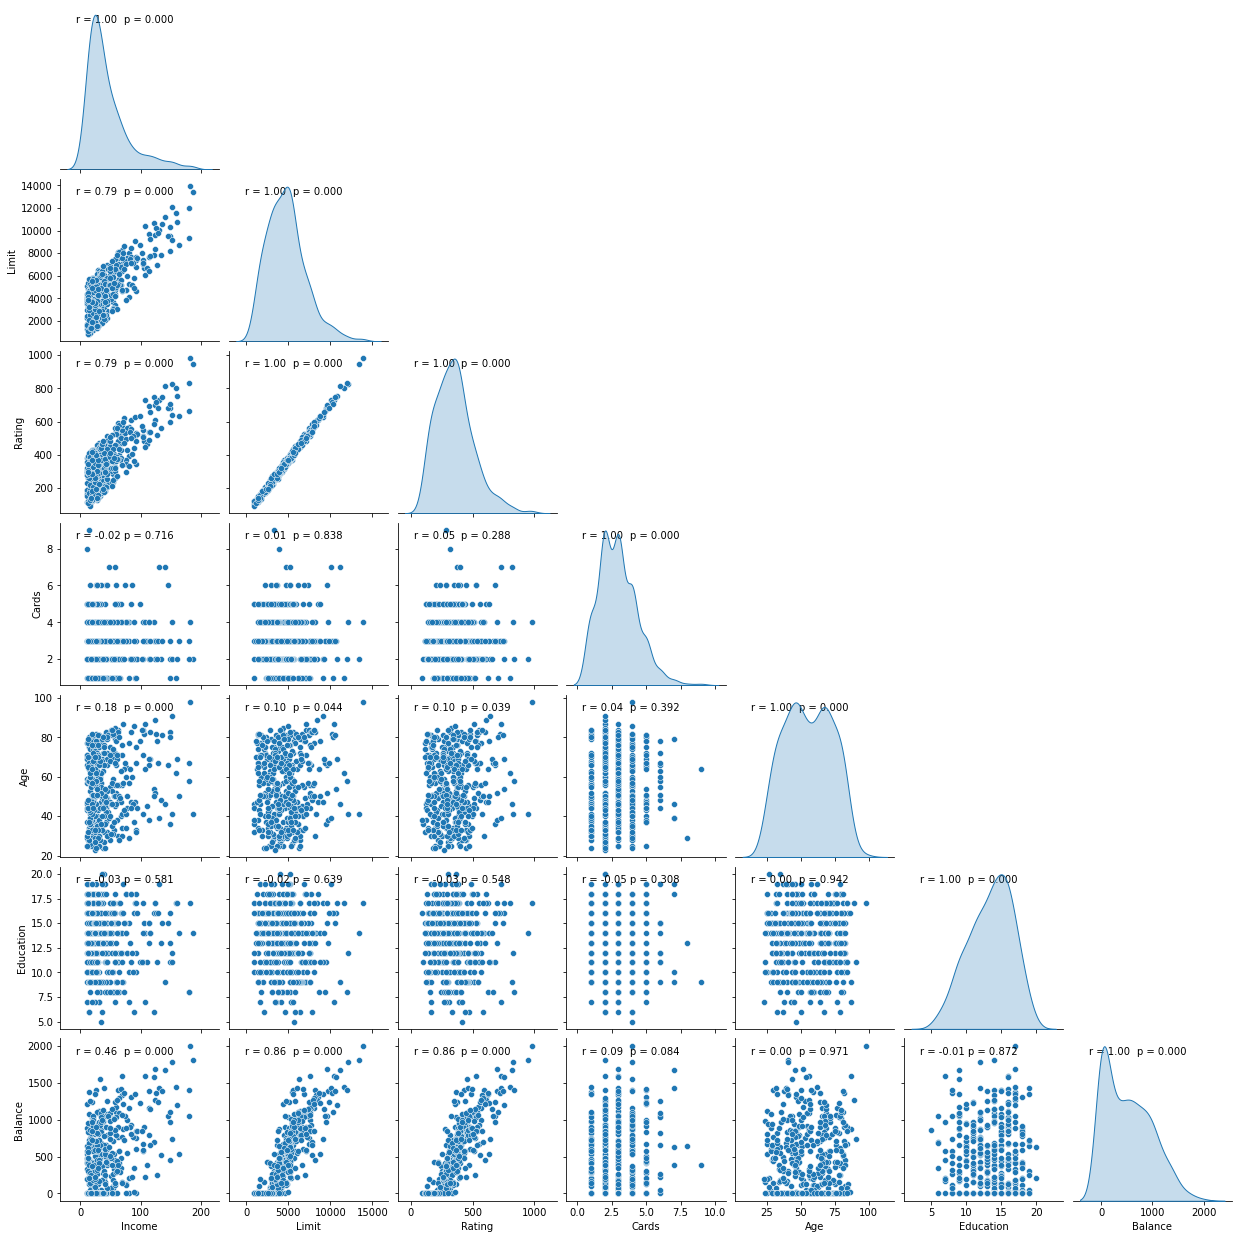

In [3]:
# code A.1

url="https://www.statlearning.com/s/Credit.csv"
df=pd.read_csv (url)

df.head(5)

df.describe()

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)
g=sns.pairplot(df,corner=True, diag_kind = 'kde')
g.map(corrfunc)
plt.show()

Dataset contains 400 observations, has no missing values and normal distributions.

Considering the continous features, the perfect correlation **r=1** >>> *Rating* and *Limit* and the strong positive correlation are: 
**r=0.86** >>> *Balance* and *Limit*, *Balance* and *Rating*
    
**r=0.79** >>> *Rating* and *Income* , *Limit* and *Income*


In [4]:
# Code A.2
df2= df[["Income", "Limit", "Rating", "Cards", "Age", "Education", "Balance"]]
df2

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331
...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560
396,13.364,3838,296,5,65,17,480
397,57.872,4171,321,5,67,12,138
398,37.728,2525,192,1,44,13,0


In [5]:
#Code A.3
df2["Balance_1500"]= np.where(df2["Balance"]>1500,1,0)
df2

C:\Users\SILVAN~1.PAI\AppData\Local\Temp/ipykernel_5016/360044251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Balance_1500"]= np.where(df2["Balance"]>1500,1,0)


,Income,Limit,Rating,Cards,Age,Education,Balance,Balance_1500
0,14.891,3606,283,2,34,11,333,0
1,106.025,6645,483,3,82,15,903,0
2,104.593,7075,514,4,71,11,580,0
3,148.924,9504,681,3,36,11,964,0
4,55.882,4897,357,2,68,16,331,0
...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560,0
396,13.364,3838,296,5,65,17,480,0
397,57.872,4171,321,5,67,12,138,0
398,37.728,2525,192,1,44,13,0,0


In [6]:
# Code A.4 
y=df2["Balance_1500"]
X=df2[["Income", "Limit", "Rating", "Cards", "Age", "Education"]]


####### logistic regression ####### 
lor=LogisticRegression(solver="lbfgs", max_iter=1000)
model_lor=lor.fit(X,y)
r_2_lor=lor.score(X,y)
print("R-Squared logistic regression: {:.3}".format(r_2_lor))
####### linear discriminant (LDA) ####### 
lda=LinearDiscriminantAnalysis()
model_lda=lda.fit(X,y)
r_2_lda=lda.score(X,y)
print("R-Squared linear discriminant (LDA): {:.3}".format(r_2_lda))
####### quadratic discriminant (DQA) ####### 
qda=QuadraticDiscriminantAnalysis()
model_qda=qda.fit(X,y)
r_2_qda=qda.score(X,y)
print("R-Squared quadratic discriminant (DQA): {:.3}".format(r_2_qda))

R-Squared logistic regression: 0.993
R-Squared linear discriminant (LDA): 0.97
R-Squared quadratic discriminant (DQA): 0.993


In [7]:
#Code A.5
df_set={"Income":[63,186],"Limit":[8100,13414], "Rating":[600,950],"Cards":[4,2],"Age":[30,41],"Education":[13,13]}
df_set=pd.DataFrame(df_set)
df_set

#Using [:,1] in the code will give you the probabilities of getting the output as 1
y_pred_prob_lor = lor.predict_proba(df_set)
print("Probability Balance >1500 - logistic regression", y_pred_prob_lor[:,1])
y_pred_prob_lda = lda.predict_proba(df_set)
print("Probability Balance >1500 - linear discriminant (LDA)", y_pred_prob_lda[:,1])
y_pred_prob_qda = qda.predict_proba(df_set)
print("Probability Balance >1500 - quadratic discriminant (DQA)", y_pred_prob_qda[:,1])

,Income,Limit,Rating,Cards,Age,Education
0,63,8100,600,4,30,13
1,186,13414,950,2,41,13


Probability Balance >1500 - logistic regression [0.34364086 0.94490244]
Probability Balance >1500 - linear discriminant (LDA) [0.05949012 0.99278801]
Probability Balance >1500 - quadratic discriminant (DQA) [4.93626009e-09 9.99216942e-01]


<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

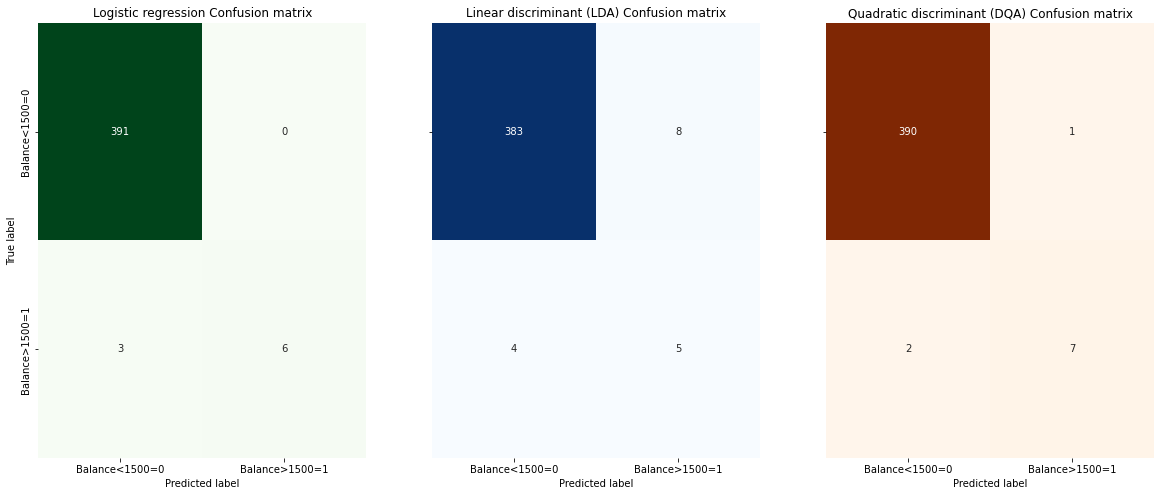

AUC Score - Logistic regression: 0.977
AUC Score - Linear discriminant (LDA): 0.952
AUC Score - Quadratic discriminant (DQA): 0.995


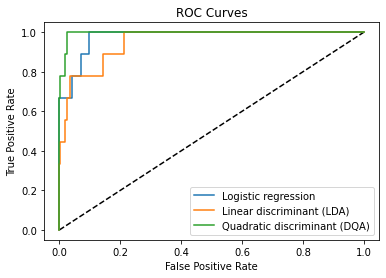

In [8]:
# Code A.6

fig = plt.figure(figsize=(20,8))

####### Confusion matrix logistic regression ####### 
plt.subplot(131)
y_pred_lor = lor.predict(X)
conf_matrix_lor = confusion_matrix(y, y_pred_lor,labels=[0,1])

_=sns.heatmap(conf_matrix_lor,cmap="Greens",  fmt='g', annot=True,
              xticklabels=['Balance<1500=0','Balance>1500=1'], yticklabels=['Balance<1500=0','Balance>1500=1'],
              cbar=False)
_=plt.title('Logistic regression Confusion matrix')
_=plt.xlabel("Predicted label")
_=plt.ylabel("True label")


####### Confusion matrix linear discriminant (LDA) ####### 
plt.subplot(132)
y_pred_lda = lda.predict(X)
conf_matrix_lda = confusion_matrix(y, y_pred_lda, labels=[0,1])

_=sns.heatmap(conf_matrix_lda,cmap="Blues",  fmt='g', annot=True,
              xticklabels=['Balance<1500=0','Balance>1500=1'],yticklabels=[''],
              cbar=False)
_=plt.title('Linear discriminant (LDA) Confusion matrix')
_=plt.xlabel("Predicted label")


####### Confusion matrix quadratic discriminant (DQA) ####### 
plt.subplot(133)
y_pred_qda = qda.predict(X)
conf_matrix_qda = confusion_matrix(y, y_pred_qda, labels=[0,1])

_=sns.heatmap(conf_matrix_qda,cmap="Oranges",  fmt='g', annot=True,
              xticklabels=['Balance<1500=0','Balance>1500=1'], yticklabels=[''], 
              cbar=False)
_=plt.title('Quadratic discriminant (DQA) Confusion matrix')
_=plt.xlabel("Predicted label")
_=plt.show()


# Compute predicted probabilities: y_pred_prob
y_pred_prob_lor = lor.predict_proba(X)[:,1]
y_pred_prob_lda = lda.predict_proba(X)[:,1]
y_pred_prob_qda = qda.predict_proba(X)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr_lor, tpr_lor, thresholds_lor = roc_curve(y , y_pred_prob_lor)
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y , y_pred_prob_lda)
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y , y_pred_prob_qda)
# Compute and print AUC score
print("AUC Score - Logistic regression: {:.3}".format(roc_auc_score(y, y_pred_prob_lor)))
print("AUC Score - Linear discriminant (LDA): {:.3}".format(roc_auc_score(y, y_pred_prob_lda)))
print("AUC Score - Quadratic discriminant (DQA): {:.3}".format(roc_auc_score(y, y_pred_prob_qda)))
# Plot ROC curve
_=plt.plot([0, 1], [0, 1], 'k--')
_=plt.plot(fpr_lor, tpr_lor, label="Logistic regression")
_=plt.plot(fpr_lda, tpr_lda, label="Linear discriminant (LDA)")
_=plt.plot(fpr_qda, tpr_qda, label="Quadratic discriminant (DQA)")
_=plt.xlabel('False Positive Rate')
_=plt.ylabel('True Positive Rate')
_=plt.title('ROC Curves')
_=plt.legend()
_=plt.show()